Exercise 1, Problem 1
Using method of successive iteration:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = [[0.6, 0.1, -0.3],
     [0.5, -0.4, 0.2],
     [1.0, -0.2, 1.1]]

b = [[12],
     [10],
     [-1]]

A, b = map(np.asarray, (A, b))

x_old = np.array([[1], [1], [1]])
tol = 1e-13
max_iter = 1000
ite = 1
error = 1

while ite < max_iter and error > tol:
    ite = ite + 1
    x_new = np.dot(A, x_old) + b
    error = (x_new[0] - x_old[0]) ** 2 + (x_new[1] - x_old[1]) ** 2 + (x_new[2] - x_old[2]) ** 2
    x_old = x_new
print(x_old)

[[ -0.8955219 ]
 [ 13.34328354]
 [ 45.64179008]]


Using matrix algebra:

In [2]:
from numpy.linalg import inv

x = np.dot(inv(np.identity(3) - A), b)
print(x)

[[ -0.89552239]
 [ 13.34328358]
 [ 45.64179104]]


Exercise 1, Problem 2

Consider the two hints given in the problem set:

(1) $|\sum_1^k x_k|<\sum_1^k |x_k|$, which can be shown by iteratively applying the triangle inequality.  
(2) $|max\{a, x\}-max\{a, y\}|\leq |x-y| (*)$, which can be shown by checking different cases:  
When $x\leq a$ and $y\leq a, (*)$ holds because the LHS is zero;  
When $x\geq a$ and $y\geq a, (*)$ holds because the two sides are equal;  
When $x\leq a, y\geq a, (*)$ holds because $|a-y|\leq |x-y|$;  
When $y\leq a, x\geq a, (*)$ holds because $|a-x|\leq |x-y|$.  
  
Define an operator $T: T(x)=c (1-\beta) + \beta\sum_{k=1}^K \max \left\{w_k ,\, \bar w\right\} p_k$. Note that \mathbb{R} with the usual metric is a complete metric space. Therefore, to use Banach's Fixed Point Theorem, we only have to show that T is a contraction:  
$|T(x)-T(y)|=\beta |(\sum_1^K max\{w_k, x\} - \sum_1^K max\{w_k, y\})p_k|$  
$\leq  \beta \sum_1^k |(max\{w_k,x\}-max\{w_k,y\})p_k|$, by hint 1  
$\leq \beta p_k \sum_1^k |p_k| |x-y| $, by hint 2  
$= \beta |x-y| $  
Since $\beta< 1$, T is indeed a contraction map.  
The existence and uniqueness of a fixed point $\bar w$ of $T$ tjis follows from Bananch's Fixed Point Theorem. This $\bar w$ is the reservation wage by definition, since the agent is indifferent between working and not working.

Exercise 1, Problem 3

[ 1.45283019  1.45378311  1.45473604  1.45568897  1.45664189  1.45759482
  1.45854774  1.45950067  1.46045359  1.46140652  1.46235944  1.46331237
  1.46426529  1.46521822  1.46617115  1.46712407  1.468077    1.46902992
  1.46998285  1.47093577  1.4718887   1.47284162  1.47379455  1.47474747
  1.4757004   1.47665333  1.47760625  1.47855918  1.4795121   1.48046503
  1.48141795  1.48237088  1.4833238   1.48427673  1.48522966  1.48618258
  1.48713551  1.48808843  1.48904136  1.48999428  1.49094721  1.49190013
  1.49285306  1.49380598  1.49475891  1.49571184  1.49666476  1.49761769
  1.49857061  1.49952354  1.50505051  1.51515152  1.52525253  1.53535354
  1.54545455  1.55555556  1.56565657  1.57575758  1.58585859  1.5959596
  1.60606061  1.61616162  1.62626263  1.63636364  1.64646465  1.65656566
  1.66666667  1.67676768  1.68686869  1.6969697   1.70707071  1.71717172
  1.72727273  1.73737374  1.74747475  1.75757576  1.76767677  1.77777778
  1.78787879  1.7979798   1.80808081  1.81818182  1.

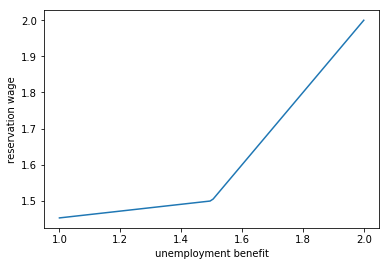

In [8]:
beta = 0.96
w = np.array([0.5, 1.0, 1.5])
p = np.array([0.2, 0.4, 0.4])
c_vals = np.linspace(1, 2, 100) # unemployment benefit

wbar_old = np.ones(100)
wbar_new = np.ones(100)
tol = 1e-13
max_iter = 10000000
ite = 1
error = np.ones(100)

for i in range(0,100):
    while ite < max_iter and error[i] > tol:
        ite = ite + 1
        wbar = wbar_old[i] * np.ones((1, 3))
        wbar_new[i] = c_vals[i] * (1 - beta) + beta * np.sum(np.maximum(wbar, w)* p)
        error[i] = abs(wbar_old[i] - wbar_new[i])
        wbar_old[i] = wbar_new[i]

print(wbar_old)
from matplotlib import pyplot as plt
plt.plot(c_vals, wbar_old)
plt.xlabel('unemployment benefit')
plt.ylabel('reservation wage')
plt.show()

As seen from the plot, reservation wage increases with unemployment benefit. This conincides with my intuition because as unemploymeny benefit increases, labor is more "costly" as compared to leisure, so a higher wage is needed to make the individuals choose to enter the labor force.